In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
N = 100  # number of points to sample for each axis

In [3]:
x = np.linspace(-0.2, 1.2, 100)
y = np.linspace(-0.2, 1.2, 100)
X, Y = np.meshgrid(x, y)

In [4]:
pos = np.dstack((X, Y))

In [5]:
pi = np.array([0.5, 0.3, 0.2])  # mixing coefficients

In [6]:
mu = np.array([[0.2, 0.4], [0.5, 0.5], [0.8, 0.6]])  # means

In [7]:
cov = np.array([[[0.02, 0.014], [0.014, 0.02]], [[0.02, -0.014], [-0.014, 0.02]], [[0.02, 0.014], [0.014, 0.02]]])  # covariance matrices

In [8]:
p = np.zeros((3, N, N), dtype=np.float64)
p_gmm = np.zeros((N, N), dtype=np.float64)

In [9]:
for k in range(len(pi)):
    p[k] = multivariate_normal.pdf(pos, mean=mu[k], cov=cov[k])
    p_gmm += pi[k] * p[k]

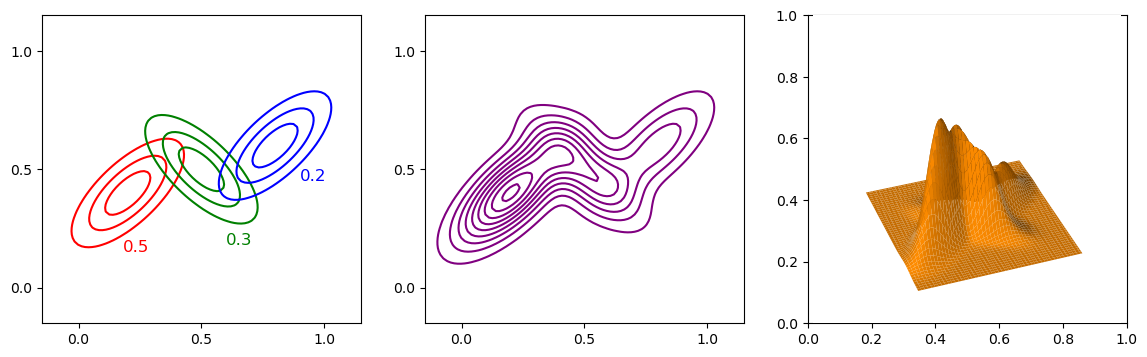

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].contour(X, Y, p[0], levels=3, colors='r')
ax[0].contour(X, Y, p[1], levels=3, colors='g')
ax[0].contour(X, Y, p[2], levels=3, colors='b')
ax[0].set_xticks([0, 0.5, 1])
ax[0].set_yticks([0, 0.5, 1])
ax[0].set_xlim(-0.15, 1.15)
ax[0].set_ylim(-0.15, 1.15)
ax[0].text(0.18, 0.15, '0.5', color='r', fontsize=12)
ax[0].text(0.6, 0.18, '0.3', color='g', fontsize=12)
ax[0].text(0.9, 0.45, '0.2', color='b', fontsize=12)

ax[1].contour(X, Y, p_gmm, levels=10, colors='purple')
ax[1].set_xticks([0, 0.5, 1])
ax[1].set_yticks([0, 0.5, 1])
ax[1].set_xlim(-0.15, 1.15)
ax[1].set_ylim(-0.15, 1.15)

ax[2] = fig.add_subplot(133, projection='3d')
ax[2].plot_surface(X, Y, p_gmm, color='darkorange')
ax[2].view_init(35, 250)
ax[2].axis('off')

plt.show()